# Машинное обучение, ФКН ВШЭ

# Практическое задание 11. Несбалансированные задачи

## Общая информация
Дата выдачи: 24.04.2025

Мягкий дедлайн: 13.05.2025 23:59 MSK

Жесткий дедлайн: 18.05.2025 23:59 MSK

## Оценивание и штрафы

Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.

## Формат сдачи
Задания сдаются через систему anytask. Посылка должна содержать:
* Ноутбук homework-practice-xx-Username.ipynb

Username — ваша фамилия и имя на латинице именно в таком порядке

## О задании

В этом задании мы разберем основные техники работы в задачах, где один из классов занимает существенно меньшую долю выборки, чем остальные. Для простоты мы обойдемся бинарной задачей, тем не менее, во многом данные методы можно перенести и на задачи с б**о**льшим числом классов. Кроме того, вы получите очередной бесценный опыт исследования случайной библиотеки случайных индусов с нуля.

In [2]:
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')

from tqdm.auto import tqdm

**Задание -1 (1 балл)**. EDA

В качестве данных для нашей работы возьмем выложенный на kaggle датасет транзакций, в котором нужно выискивать мошеннические проводки: [клик](https://www.kaggle.com/mlg-ulb/creditcardfraud). Данная задача по определению подходит под несбалансированную, что можно сказать даже без наличия каких-либо данных (понятно, что среди всех транзакций клиентов очень малая часть будет мошеннической).

Загрузим данные, проведем некоторые классические манипуляции.

In [3]:
"""%%bash
kaggle datasets download -d mlg-ulb/creditcardfraud
unzip creditcardfraud.zip""";

In [4]:
df = pd.read_csv('creditcard.csv')

In [5]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


Наши данные были анонимизированы. Мы имеем 30 признаков, из которых 28 - это результаты PCA-преобразования на исходном датасете. Еще 2 признака представляют собой время в секундах, прошедшее с момента первой транзакции в датасете, и размер транзакции. Скажите, какова доля положительных объектов в выборке?

In [6]:
import pandas as pd

fraud_ratio = df['Class'].mean()
total_transactions = len(df)
fraud_count = df['Class'].sum()

print(f"Доля мошеннических транзакций: {fraud_ratio:.4f} ({fraud_count}/{total_transactions})")

Доля мошеннических транзакций: 0.0017 (492/284807)


Начнем с обработки времени. Секунды сами по себе не несут большой информации о зависимостях в данных, попробуйте по ним создать признаки "час" (от 0 до 23) и "день" (от 0 до ...) в аналогичной манере (принимая первый объект выборки за начальную точку). Сколько дней покрывают данные?

In [7]:
df['Hour'] = (df['Time'] // 3600) % 24
df['Day'] = (df['Time'] // 86400)

total_days = df['Day'].max() - df['Day'].min() + 1
print(f"Данные покрывают {total_days} дней.")

Данные покрывают 2.0 дней.


Постройте следующие графики:

1. Распределение числа транзакций по каждому часу (line-plot).
2. Распределение доли мошеннических транзакций по каждому часу (line-plot)
3. То же самое для дней (здесь можно использовать bar-plot, так как дней должно быть немного).

Какие выводы можно сделать из графиков? На ваш взгляд, как можно связать полученные нами часы с реальными часами в сутках?

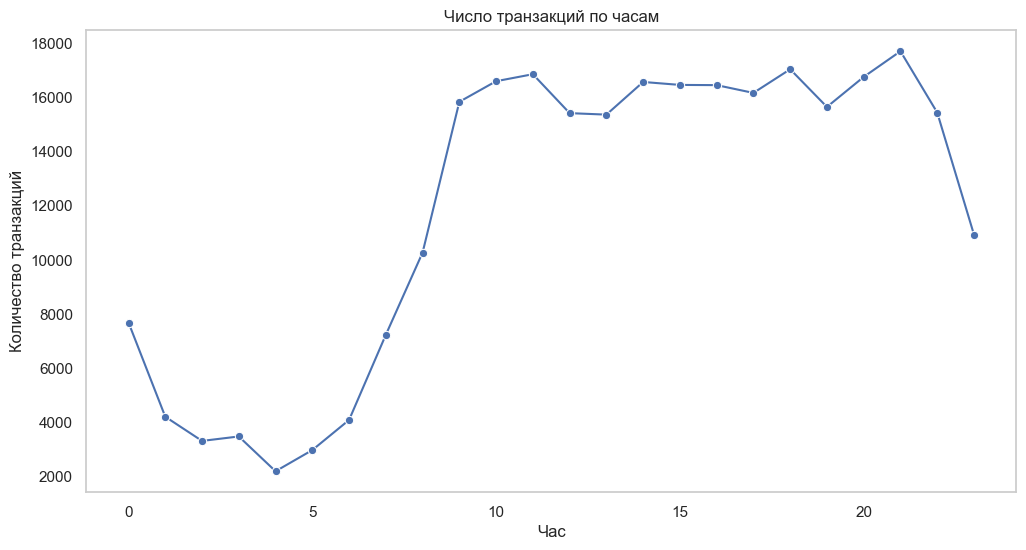

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

hourly_counts = df['Hour'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x=hourly_counts.index, y=hourly_counts.values, marker='o')
plt.title('Число транзакций по часам')
plt.xlabel('Час')
plt.ylabel('Количество транзакций')
plt.grid()
plt.show()

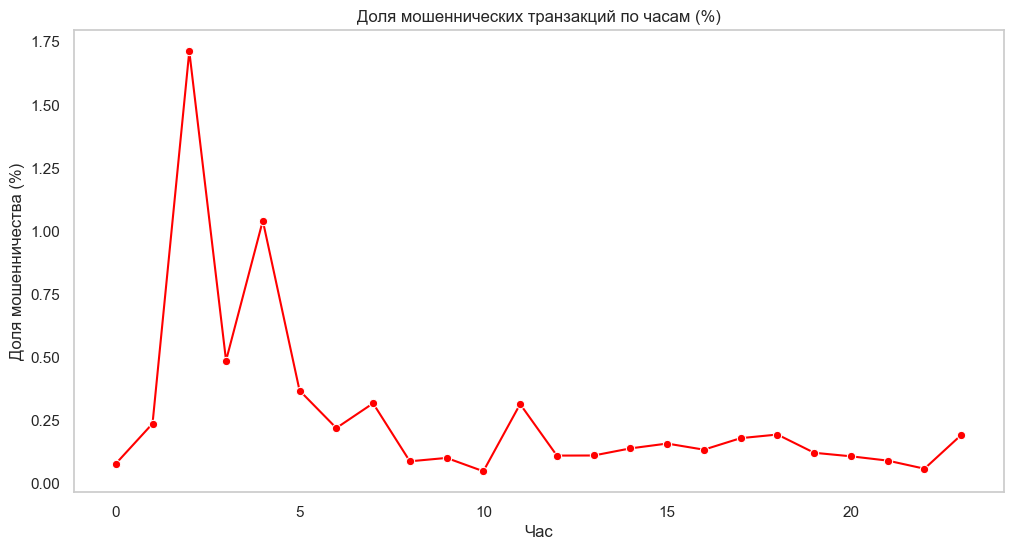

In [9]:
hourly_fraud = df.groupby('Hour')['Class'].mean() * 100  # В процентах

plt.figure(figsize=(12, 6))
sns.lineplot(x=hourly_fraud.index, y=hourly_fraud.values, color='red', marker='o')
plt.title('Доля мошеннических транзакций по часам (%)')
plt.xlabel('Час')
plt.ylabel('Доля мошенничества (%)')
plt.grid()
plt.show()

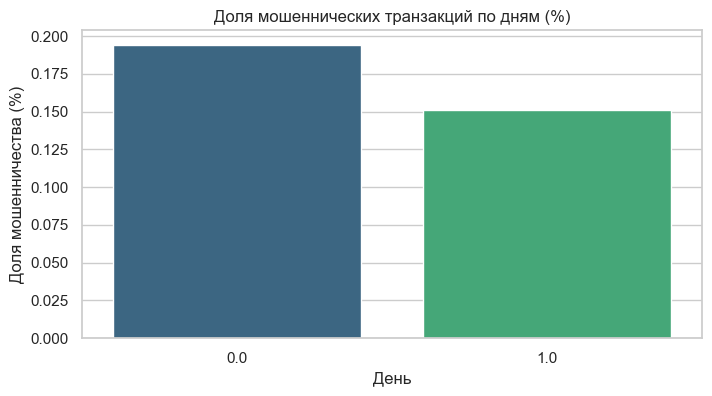

In [10]:
daily_fraud = df.groupby('Day')['Class'].mean() * 100

plt.figure(figsize=(8, 4))
sns.barplot(x=daily_fraud.index, y=daily_fraud.values, palette='viridis')
plt.title('Доля мошеннических транзакций по дням (%)')
plt.xlabel('День')
plt.ylabel('Доля мошенничества (%)')
plt.show()

С анонимизированными признаками вряд ли можно придумать что-то интересное. Попробуйте (например, с помощью корреляции?) выбрать несколько наиболее важных признаков и поглядеть на различия в их распределении для разных классов.

In [11]:
correlations = df.corr()['Class'].abs().sort_values(ascending=False)

top_features = correlations.index[1:6]
print("Топ-5 признаков по корреляции с Class:")
print(top_features)

Топ-5 признаков по корреляции с Class:
Index(['V17', 'V14', 'V12', 'V10', 'V16'], dtype='object')


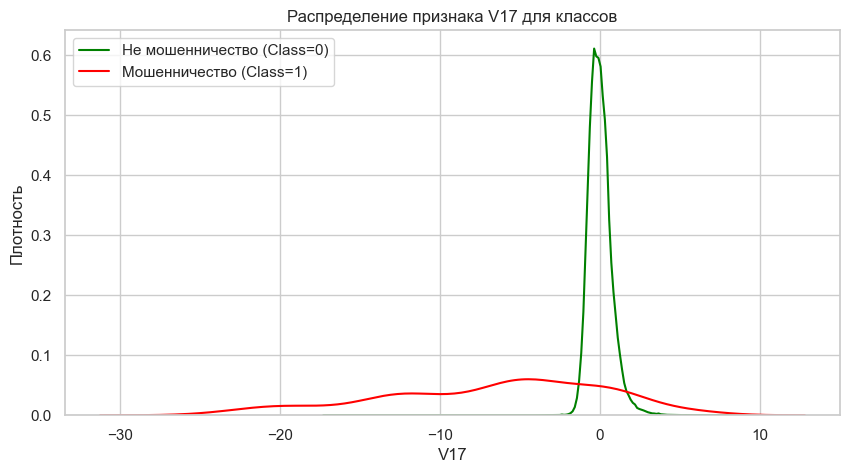

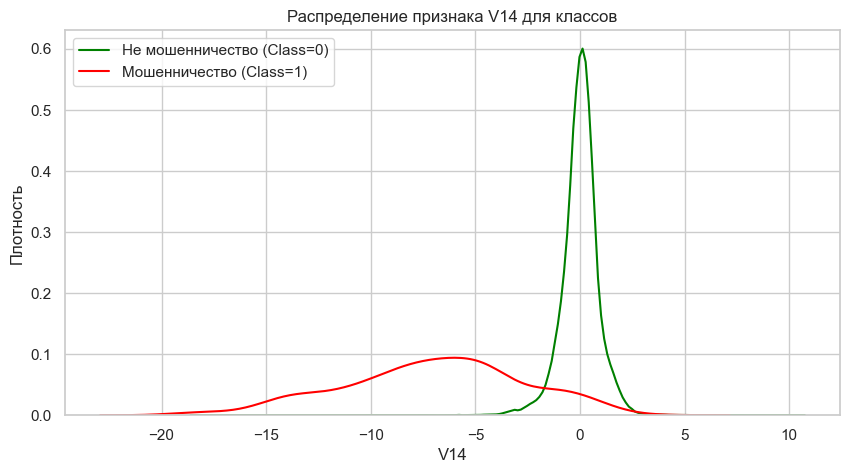

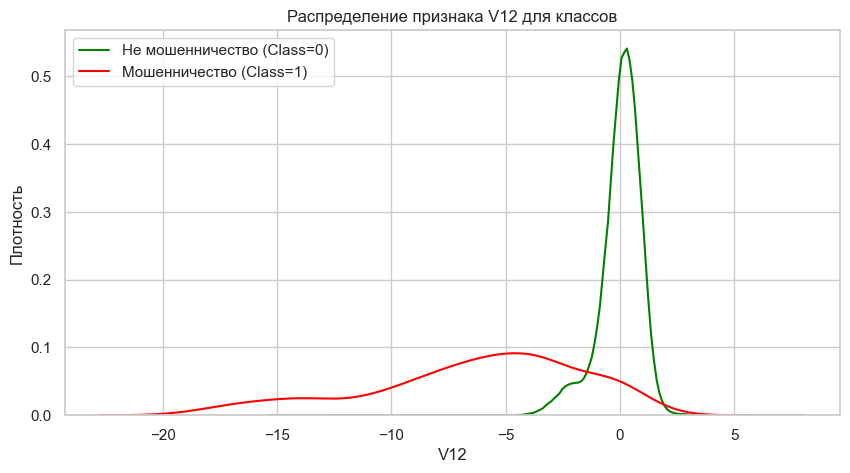

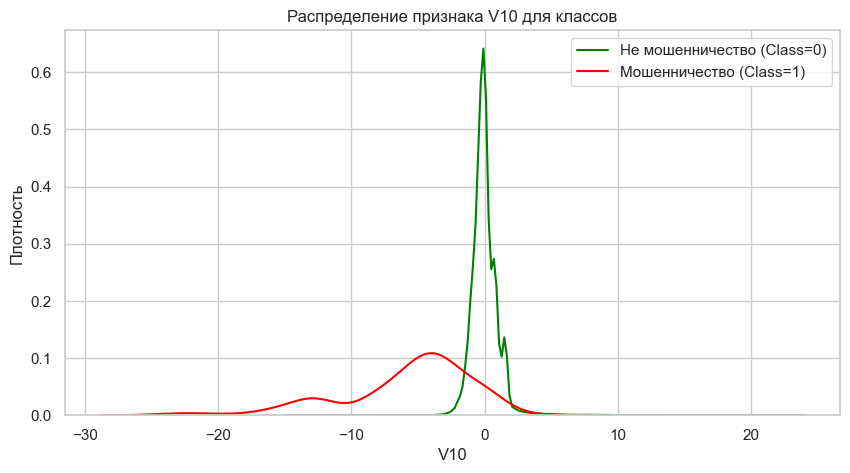

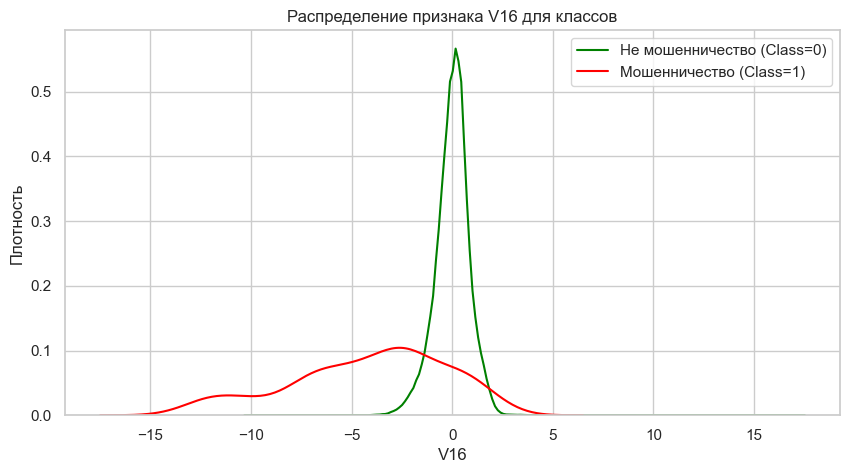

In [12]:
sns.set(style="whitegrid")

for feature in top_features:
    plt.figure(figsize=(10, 5))
    sns.kdeplot(df[df['Class'] == 0][feature], label='Не мошенничество (Class=0)', color='green')
    sns.kdeplot(df[df['Class'] == 1][feature], label='Мошенничество (Class=1)', color='red')
    plt.title(f'Распределение признака {feature} для классов')
    plt.xlabel(feature)
    plt.ylabel('Плотность')
    plt.legend()
    plt.show()


Теперь давайте разделим данные. Отделите хронологически последние 20% транзакций и поделите их пополам (также хронологически, т.е. без перемешивания) на валидационные и тестовые. Это разбиение не совсем корректно (как можно было заметить, мошеннические транзакции имеют разное распределение во времени - по-хорошему, нам стоило бы выделить целые сутки записей как под валидацию, так и под тест), тем не менее, мы не сможем получить больше данных для адекватного контроля, поэтому обойдемся этим. 

In [13]:
df_sorted = df.sort_values('Time').reset_index(drop=True)

split_idx = int(0.8 * len(df_sorted))
train = df_sorted.iloc[:split_idx].copy()
holdout = df_sorted.iloc[split_idx:].copy()

holdout_split_idx = len(holdout) // 2
validation = holdout.iloc[:holdout_split_idx].copy()
test = holdout.iloc[holdout_split_idx:].copy()

print(f"Train: {len(train)} samples ({len(train)/len(df):.1%})")
print(f"Validation: {len(validation)} samples ({len(validation)/len(df):.1%})")
print(f"Test: {len(test)} samples ({len(test)/len(df):.1%})")

print("\nРаспределение Class в train:", train['Class'].mean())
print("Распределение Class в validation:", validation['Class'].mean())
print("Распределение Class в test:", test['Class'].mean())

Train: 227845 samples (80.0%)
Validation: 28481 samples (10.0%)
Test: 28481 samples (10.0%)

Распределение Class в train: 0.001830191577607584
Распределение Class в validation: 0.0018608897159509848
Распределение Class в test: 0.000772444787753239


# Часть 1. Несбалансированная классификация.

**Задание 0. (1 балл)**: перед началом работы давайте поговорим о том, как мы будем оценивать качество. Классические метрики для качества классификации чаще всего "ломаются" на задачах с сильным перекосом. Чему будет равно значение accuracy для наивного предсказания (= мажорный класс для каждого объекта)? (можете не отвечать, просто подумайте)

Из курса МО-1 вам уже известно, что мы можем использовать в таких задачах `AUC-PR` и получать адекватные показатели. Можно сказать, что `AUC-PR` представляет собой матожидание `precision` по распределению, заданному выигрышем в `recall` при смене порога. 

Большинство меток 0, поэтому accuracy будет под 100%, а precision = 0 и recall = 0.

In [14]:
from sklearn.metrics import average_precision_score, precision_recall_curve

Тем не менее, существуют и другие, не менее интересные метрики. Одной из таких метрик является коэффициент Каппа Коэна, представляющий собой нормализованную `accuracy`:

$$\kappa = \frac{p_o - p_e}{1 - p_e}$$

Данная метрика служит в качестве меры согласованности между двумя независимыми предсказателями, но ничего не знает про "верные" и "предсказанные" метки (в отличие от многих других метрик машинного обучения). Здесь $p_o$ - доля согласованных предсказаний, а $p_e$ - доля согласованных предсказаний, которая могла бы получиться при случайных ответах предсказателей. В нашем случае это работает так:

• В качестве $p_o$ берем accuracy

• В качестве $p_e$ примем следующую величину - вероятность случайного соглашения позитивных ответов (произведение долей позитивных ответов в обоих предсказаниях) плюс вероятность случайного соглашения негативных ответов (произведение долей негативных ответов в обоих предсказаниях)

Метрика принимает значения от -1 до 1, где 1 - полная согласованность, 0 - согласованность на уровне рандома, -1 - совсем плохо. Как уже говорилось, метрика не различает "верные" и "предсказанные" метки, поэтому является симметричной (можете использовать это для отладки):

Еще одной метрикой в такой задаче служит коэффициент корреляции Мэтьюза, выражающийся в терминах матрицы ошибок следующим образом:

$$\text{MCC} = \frac{TP\times TN - FP \times FN}{\sqrt{(TP+FP)(TP+FN)(TN+FP)(TN+FN)}}$$ 

Метрика принимает значения от -1 до 1, интерпретируемые аналогичным образом. 

Обратите внимание, что эти метрики вычисляются на бинаризованных предсказаниях, поэтому может иметь смысл дополнительная настройка порога бинаризации.

Давайте проверим, что наши метрики действительно подходят под задачу. Вычислите их значения для наивного предсказания (aka мажорный класс для всех объектов):

In [15]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    cohen_kappa_score, matthews_corrcoef,
    average_precision_score
)

y_true = test['Class']
y_pred_naive = np.zeros_like(y_true)

metrics = {
    "Accuracy": accuracy_score(y_true, y_pred_naive),
    "Precision": precision_score(y_true, y_pred_naive, zero_division=0),
    "Recall": recall_score(y_true, y_pred_naive),
    "Kappa": cohen_kappa_score(y_true, y_pred_naive),
    "MCC": matthews_corrcoef(y_true, y_pred_naive),
    "AUC-PR": average_precision_score(y_true, y_pred_naive)
}

for name, value in metrics.items():
    print(f"{name}: {value:.4f}")

Accuracy: 0.9992
Precision: 0.0000
Recall: 0.0000
Kappa: 0.0000
MCC: 0.0000
AUC-PR: 0.0008


Давайте запустим бейзлайн-решение для нашей задачи. С чего же начнем? Возьмите `catboost` и обучите его классификатор на наших данных (используйте все признаки). Вычислите значения всех метрик на тестовой части, для контроля переобучения используйте валидационную (здесь и далее везде, где фигурирует `catboost`). 

In [16]:
from catboost import CatBoostClassifier

In [17]:
features = [col for col in train.columns if col not in ['Class', 'Time']]
X_train, y_train = train[features], train['Class']
X_val, y_val = validation[features], validation['Class']
X_test, y_test = test[features], test['Class']

In [18]:
model = CatBoostClassifier(
    iterations=1000,
    learning_rate=0.05,
    depth=6,
    eval_metric='AUC',
    early_stopping_rounds=50,
    class_weights=[0.1, 10],
    verbose=50
)

model.fit(
    X_train, y_train,
    eval_set=(X_val, y_val),
    use_best_model=True
)

0:	test: 0.9545290	best: 0.9545290 (0)	total: 122ms	remaining: 2m 2s
50:	test: 0.9873763	best: 0.9904326 (39)	total: 3.01s	remaining: 56.1s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.9904326322
bestIteration = 39

Shrink model to first 40 iterations.


In [19]:
from sklearn.metrics import roc_auc_score
y_proba = model.predict_proba(X_test)[:, 1]

y_pred = (y_proba >= 0.5).astype(int)

metrics = {
    "Accuracy": accuracy_score(y_test, y_pred),
    "Precision": precision_score(y_test, y_pred, zero_division=0),
    "Recall": recall_score(y_test, y_pred),
    "Kappa": cohen_kappa_score(y_test, y_pred),
    "MCC": matthews_corrcoef(y_test, y_pred),
    "AUC-PR": average_precision_score(y_test, y_proba),
    "ROC-AUC": roc_auc_score(y_test, y_proba)
}

for name, value in metrics.items():
    print(f"{name}: {value:.4f}")

Accuracy: 0.9991
Precision: 0.4324
Recall: 0.7273
Kappa: 0.5419
MCC: 0.5604
AUC-PR: 0.7115
ROC-AUC: 0.9597


Если вы все сделали правильно, у вас должны были получиться значения в районе 0.7.

**Задание 1. (1 балл)**. Многие реализации методов предлагают встроенные способы для борьбы с нашей проблемой. Самое часто встречающееся решение - просто добавить вес в функции потерь для минорного класса (таким образом, ошибка на объекте минорного класса будет весить больше, чем для мажорного). В `catboost` это также реализовано, причем для бинарной задачи это можно сделать целыми двумя способами (можете выбрать любой, на свой вкус, автор задания предпочитает отдельный скейлинг для минорного класса). Чаще всего в качестве веса берется отношение числа объектов мажорного класса к числу минорного. Попробуйте обучить модель с таким скалированием и сравните метрики на тестовой части с бейзлайном.

In [20]:
n_majority = y_train.value_counts()[0]
n_minority = y_train.value_counts()[1]
weight = n_majority / n_minority
print(f"Вес для минорного класса (Class=1): {weight:.2f}")

model_weighted = CatBoostClassifier(
    iterations=1000,
    learning_rate=0.05,
    depth=6,
    eval_metric='AUC',
    early_stopping_rounds=50,
    class_weights=[1, weight],
    verbose=50
)

model_weighted.fit(
    X_train, y_train,
    eval_set=(X_val, y_val),
    use_best_model=True
)


Вес для минорного класса (Class=1): 545.39
0:	test: 0.9512028	best: 0.9512028 (0)	total: 56.8ms	remaining: 56.8s
50:	test: 0.9881017	best: 0.9897172 (31)	total: 3.23s	remaining: 1m
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.9897171537
bestIteration = 31

Shrink model to first 32 iterations.


In [21]:
y_proba_weighted = model_weighted.predict_proba(X_test)[:, 1]
y_pred_weighted = (y_proba_weighted >= 0.5).astype(int)

metrics_weighted = {
    "Accuracy": accuracy_score(y_test, y_pred_weighted),
    "Precision": precision_score(y_test, y_pred_weighted, zero_division=0),
    "Recall": recall_score(y_test, y_pred_weighted),
    "Kappa": cohen_kappa_score(y_test, y_pred_weghted),
    "MCC": matthews_corrcoef(y_test, y_pred_weighted)
    "AUC-PR": average_precision_score(y_test, y_proba_weighted),
    "ROC-AUC": roc_auc_score(y_test, y_proba_weighted)
}

print("\nМетрики с весами классов:")
for name, value in metrics_weighted.items():
    print(f"{name}: {value:.4f}")

print("\nМетрики бейзлайна (без весов):")
for name, value in metrics.items():
    print(f"{name}: {value:.4f}")


Метрики с весами классов:
Accuracy: 0.9961
Precision: 0.1311
Recall: 0.7273
AUC-PR: 0.7191
MCC: 0.3078

Метрики бейзлайна (без весов):
Accuracy: 0.9991
Precision: 0.4324
Recall: 0.7273
Kappa: 0.5419
MCC: 0.5604
AUC-PR: 0.7115
ROC-AUC: 0.9597


Поскольку данный вес будет являться гиперпараметром метода, было бы опрометчиво остановиться на одном значении (тем более, с большой вероятностью у вас все сломалось). Запустите перебор для этого гиперпараметра на валидационной выборке (используйте `PR-AUC`), подберите оптимальный порог бинаризации для $\kappa$ или $\text{MCC}$. Для лучшего найденного веса и порога вычислите все метрики на тестовой части. 

При этом можете также проверить отдельное скалирование в большую сторону для мажорного класса (т.е. веса минорного сделать меньше 1) и экстремальные скалирования (т.е. веса минорного больше, чем в начале этого задания). Какой вес получился оптимальным?

**Задание 2. (1 балл)**. На самом деле, то, что мы сейчас делали, очень схоже с другой распространенной техникой - оверсэмплингом. Фактически, мы можем продублировать все объекты минорного класса и получить тот же эффект, какой был бы при использовании веса, равного 2. Тем не менее, такой подход - это лишь малая часть того, что мы можем проделать с целью повысить число объектов минорного класса. 

Для продолжения работы установим библиотеку [imbalanced-learn](https://imbalanced-learn.org/stable/):

Первый метод, которым мы воспользуемся, называется SMOTE (его вы уже разбирали на лекции). Кратко напомним суть: мы выбираем случайного кандидата среди $k$ ближайших соседей объекта минорного класса, затем берем точку на отрезке между двумя объектами (т.е. выпуклую комбинацию со случайными коэффициентами) и добавляем в выборку. 

In [22]:
from imblearn.over_sampling import SMOTE

Используйте SMOTE для ресэмплинга обучающей выборки, на новой выборке обучите модель (вес положительных объектов скалировать не нужно). Замерьте качество на тестовой выборке (**важно!** не преобразовывайте валидационную и тестовую выборку никак - мы не хотим отслеживать качество на объектах, которых в реальности не существует). Сравните полное выравнивание выборки с частичным (т.е. таким, что баланс классов улучшается, но не достигает равенства - скажем, 1:2 и 1:10).

In [29]:
X_train, y_train = train[features], train['Class']
X_val, y_val = validation[features], validation['Class']
X_test, y_test = test[features], test['Class']

ratios = [
    (1.0, '1:1 (полное выравнивание)'),
    (0.5, '1:2'),
    (0.1, '1:10')
]

results = {}

for ratio, name in ratios:
    smote = SMOTE(sampling_strategy=ratio, random_state=42, k_neighbors=5)
    X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
    
    model = CatBoostClassifier(
        iterations=1000,
        learning_rate=0.05,
        depth=6,
        eval_metric='AUC',
        early_stopping_rounds=50,
        verbose=0
    )
    model.fit(
        X_resampled, y_resampled,
        eval_set=(X_val, y_val),
        use_best_model=True
    )
    
    y_proba = model.predict_proba(X_test)[:, 1]
    y_pred = (y_proba >= 0.5).astype(int)
    
    results[name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, zero_division=0),
        "Recall": recall_score(y_test, y_pred),
        "Kappa": cohen_kappa_score(y_test, y_pred),
        "MCC": matthews_corrcoef(y_test, y_pred),
        "AUC-PR": average_precision_score(y_test, y_proba),
        "ROC-AUC": roc_auc_score(y_test, y_proba)
    }
    print(name, results[name])

/Users/ilushka/opt/miniconda3/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


1:1 (полное выравнивание) {'Accuracy': 0.9959973315543695, 'Precision': 0.12903225806451613, 'Recall': 0.7272727272727273, 'Kappa': 0.21815222128844125, 'MCC': 0.30528493944255747, 'AUC-PR': 0.6242134255389761, 'ROC-AUC': 0.9813479678900109}


/Users/ilushka/opt/miniconda3/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


1:2 {'Accuracy': 0.9987711105649381, 'Precision': 0.35555555555555557, 'Recall': 0.7272727272727273, 'Kappa': 0.4770693409615858, 'MCC': 0.5080062050334478, 'AUC-PR': 0.6786805015401631, 'ROC-AUC': 0.9806308277617881}


/Users/ilushka/opt/miniconda3/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


1:10 {'Accuracy': 0.9992275552122467, 'Precision': 0.5, 'Recall': 0.7272727272727273, 'Kappa': 0.5922192733667151, 'MCC': 0.6026624192123664, 'AUC-PR': 0.6765304527754515, 'ROC-AUC': 0.9831775536737061}


**Бонус (1.5 балла)**. Для vanilla SMOTE существуют некоторые модификации, часть из которых была реализована в библиотеке imblearn. Во время лекций/семинаров эти модификации не рассматривались, тем не менее, мы все равно их исследуем.

Найдите статьи о следующих методах и попробуйте вкратце сформулировать, в чем их основная идея (сделайте так, чтобы человек, знакомый с машинным обучением в целом, но не слышавший конкретно про это смог понять):

BorderlineSMOTE - 

SVM-SMOTE - 

K-Means-SMOTE - 

ADASYN - 

Теперь попробуйте сравнить качество всех методов на наших данных.

In [ ]:
#your code here

**Задание 3. (1 балл)**. До этого момента все наши решения концентрировались на работе с минорным классом. Теперь давайте попробуем зайти с другой стороны. Может быть, для восстановления закономерностей нам не нужно столько объектов мажорного класса, и они просто засоряют нам выборку лишней информацией?

Для решения этой проблемы существуют методы андерсэмплинга. Самое простое, что можно придумать - удалять точки мажорного класса, пока мы не получим приемлемый баланс. Протестируйте следующий метод и постройте графики достигаемых значений метрик от баланса классов и от отношения размеров исходной и пересэмпленной выборки:

In [33]:
import matplotlib.pyplot as plt

X_train, y_train = train[features], train['Class']

ratios = [1.0, 0.5, 0.1, 0.01]
results = {}

for ratio in ratios:
    rus = RandomUnderSampler(sampling_strategy=ratio, random_state=42)
    X_resampled, y_resampled = rus.fit_resample(X_train, y_train)
    
    model = CatBoostClassifier(
        iterations=1000,
        learning_rate=0.05,
        depth=6,
        eval_metric='AUC',
        early_stopping_rounds=50,
        verbose=0
    )
    model.fit(
        X_resampled, y_resampled,
        eval_set=(X_val, y_val),
        use_best_model=True
    )
    
    y_proba = model.predict_proba(X_test)[:, 1]
    y_pred = (y_proba >= 0.5).astype(int)
    
    results[ratio] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, zero_division=0),
        "Recall": recall_score(y_test, y_pred),
        "Kappa": cohen_kappa_score(y_test, y_pred),
        "MCC": matthews_corrcoef(y_test, y_pred),
        "AUC-PR": average_precision_score(y_test, y_proba),
        "ROC-AUC": roc_auc_score(y_test, y_proba),
        "Train Size %": len(X_resampled) / len(X_train) * 100  # % оставшихся данных
    }

for ratio, metrics in results.items():
    print(ratio, metrics,'\n')

/Users/ilushka/opt/miniconda3/lib/python3.9/site-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
/Users/ilushka/opt/miniconda3/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(
/Users/ilushka/opt/miniconda3/lib/python3.9/site-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
/Users/ilushka/opt/miniconda3/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instea

1.0 {'Accuracy': 0.9858151048067132, 'Precision': 0.040865384615384616, 'Recall': 0.7727272727272727, 'Kappa': 0.07627018906143956, 'MCC': 0.17569771758499997, 'AUC-PR': 0.7123962948737025, 'ROC-AUC': 0.9851892195790436, 'Train Size %': 0.36603831552151683}
0.5 {'Accuracy': 0.9885186615638496, 'Precision': 0.04747774480712166, 'Recall': 0.7272727272727273, 'Kappa': 0.08781362235354839, 'MCC': 0.18395952568249838, 'AUC-PR': 0.5112579890643645, 'ROC-AUC': 0.9659158789838014, 'Train Size %': 0.5490574732822752}
0.1 {'Accuracy': 0.9990871107053826, 'Precision': 0.4444444444444444, 'Recall': 0.7272727272727273, 'Kappa': 0.551293874983791, 'MCC': 0.5681256244921765, 'AUC-PR': 0.6559016177451373, 'ROC-AUC': 0.9804487476401458, 'Train Size %': 2.0132107353683426}
0.01 {'Accuracy': 0.9995786664794073, 'Precision': 0.75, 'Recall': 0.6818181818181818, 'Kappa': 0.7140753704859444, 'MCC': 0.71488755582656, 'AUC-PR': 0.6840073817346342, 'ROC-AUC': 0.9773885238413156, 'Train Size %': 18.4849349338366

Даже такой наивный подход может дать относительно неплохие результаты и улучшить наши метрики. Тем не менее, сейчас мы никак не используем информацию о распределении объектов в выборке. Оказывается, что даже относительно простые эвристические правила могут заметно поднять нам качество - например, мы можем при отбрасывании использовать близость отдельных объектов мажорного класса к минорному и отбрасывать самые близкие. Протестируйте алгоритм [Near-Miss](https://www.site.uottawa.ca/~nat/Workshop2003/jzhang.pdf) на наших данных и постройте графики, аналогичные предыдущему пункту (также добавьте график с зависимостью качества от числа соседей).

In [38]:
from imblearn.under_sampling import NearMiss

ratios = [1.0, 0.5, 0.1, 0.01]
n_neighbors_list = [1, 3, 5, 10]

results = {}

for ratio in ratios:
    for n_neighbors in n_neighbors_list:
        nm = NearMiss(
            sampling_strategy=ratio,
            version=1,
            n_neighbors=n_neighbors
        )
        X_resampled, y_resampled = nm.fit_resample(X_train, y_train)
        
        model = CatBoostClassifier(
            iterations=1000,
            learning_rate=0.05,
            depth=6,
            eval_metric='AUC',
            early_stopping_rounds=50,
            verbose=0
        )
        model.fit(
            X_resampled, y_resampled,
            eval_set=(X_val, y_val),
            use_best_model=True
        )
        
        y_proba = model.predict_proba(X_test)[:, 1]
        y_pred = (y_proba >= 0.5).astype(int)
        
        key = f"Balance 1:{int(1/ratio)}, Neighbors={n_neighbors}"
        results[key] = {
            "Accuracy": accuracy_score(y_test, y_pred),
            "Precision": precision_score(y_test, y_pred, zero_division=0),
            "Recall": recall_score(y_test, y_pred),
            "Kappa": cohen_kappa_score(y_test, y_pred),
            "MCC": matthews_corrcoef(y_test, y_pred),
            "AUC-PR": average_precision_score(y_test, y_proba),
            "ROC-AUC": roc_auc_score(y_test, y_proba),
            "Train Size %": len(X_resampled) / len(X_train) * 100
        }

for config, metrics in results.items():
    print(config, metrics,'\n')

/Users/ilushka/opt/miniconda3/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/Users/ilushka/opt/miniconda3/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/Users/ilushka/opt/miniconda3/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/Users/ilushka/opt/miniconda3/lib/pyt

Balance 1:1, Neighbors=1 {'Accuracy': 0.4174361855271936, 'Precision': 0.001264146400192632, 'Recall': 0.9545454545454546, 'Kappa': 0.0009836201581022719, 'MCC': 0.020938212559248385, 'AUC-PR': 0.6251460245604554, 'ROC-AUC': 0.9176095435538847, 'Train Size %': 0.36603831552151683} 

Balance 1:1, Neighbors=3 {'Accuracy': 0.3097152487623328, 'Precision': 0.0010670731707317074, 'Recall': 0.9545454545454546, 'Kappa': 0.000589508488083812, 'MCC': 0.015858247599037804, 'AUC-PR': 0.5486652730232495, 'ROC-AUC': 0.8589725570118416, 'Train Size %': 0.36603831552151683} 

Balance 1:1, Neighbors=5 {'Accuracy': 0.09378181945858642, 'Precision': 0.0008130081300813008, 'Recall': 0.9545454545454546, 'Kappa': 8.118295798509312e-05, 'MCC': 0.004557483945629844, 'AUC-PR': 0.6096187749807731, 'ROC-AUC': 0.8317899114835058, 'Train Size %': 0.36603831552151683} 

Balance 1:1, Neighbors=10 {'Accuracy': 0.22709876759945227, 'Precision': 0.0009531157808741434, 'Recall': 0.9545454545454546, 'Kappa': 0.000361539

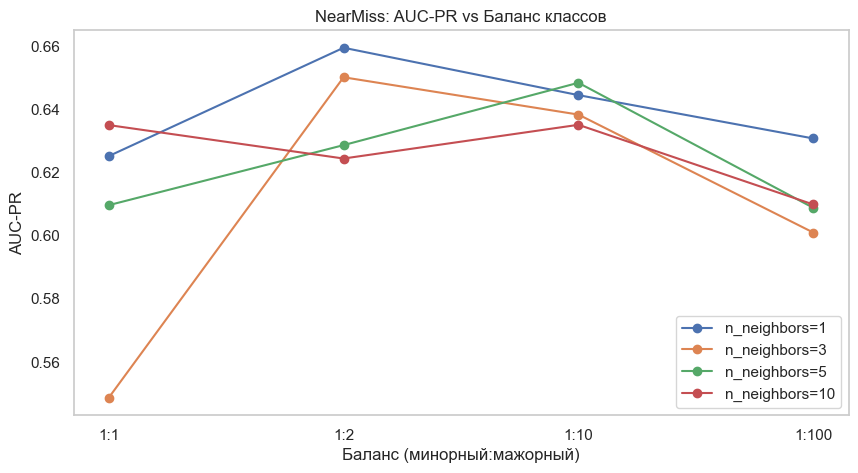

In [54]:
plt.figure(figsize=(10, 5))
for n in n_neighbors_list:
    auc_pr_values = [results[f"Balance 1:{int(1/r)}, Neighbors={n}"]["AUC-PR"] for r in ratios]
    plt.plot([f"1:{int(1/r)}" for r in ratios], auc_pr_values, marker='o', label=f"n_neighbors={n}")

plt.title("NearMiss: AUC-PR vs Баланс классов")
plt.xlabel("Баланс (минорный:мажорный)")
plt.ylabel("AUC-PR")
plt.legend()
plt.grid()
plt.show()

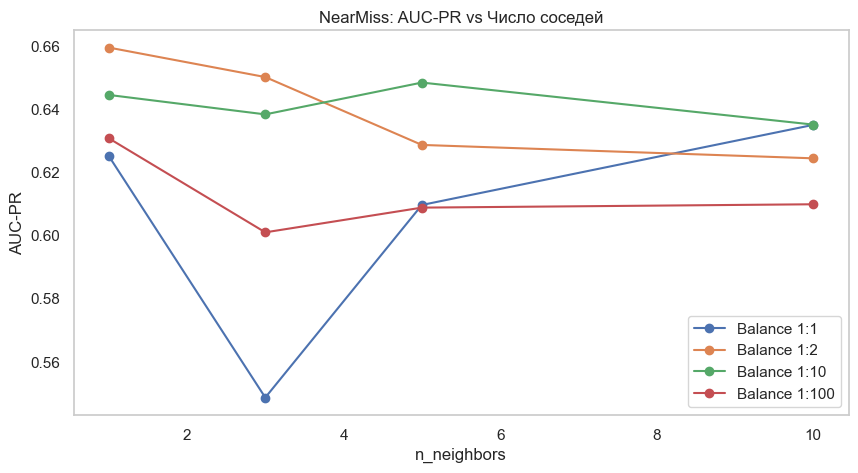

In [56]:
plt.figure(figsize=(10, 5))
for r in ratios:
    auc_pr_values = [results[f"Balance 1:{int(1/r)}, Neighbors={n}"]["AUC-PR"] for n in n_neighbors_list]
    plt.plot(n_neighbors_list, auc_pr_values, marker='o', label=f"Balance 1:{int(1/r)}")

plt.title("NearMiss: AUC-PR vs Число соседей")
plt.xlabel("n_neighbors")
plt.ylabel("AUC-PR")
plt.legend()
plt.grid()
plt.show()

**Бонус (1 балл)**. imblearn также предлагает много различных методов для андерсэмплинга. Выберите что-нибудь еще из предлагаемого на свой вкус, опишите идею метода и протестируйте его.


In [ ]:
#your code here

# Часть 2. Поиск аномалий. 

Как вы могли заметить, методы балансировки выборок очень часто могут привести к не самым лучшим результатам из-за того, что они по сути искажают информацию о реальном распределении данных - в реальности обычно требуется долгий подбор в принципе работоспособных для задачи методов и их аккуратная настройка. 

Теперь давайте попробуем слегка сменить постановку задачи и переключиться на задачу "одноклассовой" классификации, то есть - поиска *аномалий* в выборке. В общем-то, это вполне согласуется с нашей областью работы - мы действительно можем назвать мошеннические транзакции аномальньми (как интуитивно, так и на основании наблюдаемой балансировки данных). 

Стоит отметить, что методы обнаружения аномалий чаще всего относятся к классу методов обучения без учителя. Это дает некоторый положительный эффект - нам не обязательно нужно тратить время на разметку данных (тем не менее, для контроля качества какую-то часть разметить все-таки придется). Впрочем, чаще всего перфоманс таких методов оказывается заметно хуже, чем у честного обучения с учителем (если мы можем себе его позволить).



**Задание 4. (3 балла).** На занятиях вы разбирали схожий с Random Forest подход для детекции аномалий без известной разметки данных, называемый Isolation Forest. Напомним суть: на этапе обучения мы создаем ансамбль из решающих деревьев, в котором признак и порог на каждую вершину подбираются случайно. Затем мы считаем для объектов оценку аномальности через длину пути до соответствующего листа в каждом дереве.

В данном задании вам предлагается реализовать модификацию данного алгоритма, известную как Extended Isolation Forest. В ней мы на каждом шаге будем определять не порог для признака, а полноценную случайную гиперплоскость, разбивающую выборку на 2 части. С детальным описанием вы можете ознакомиться [здесь](https://arxiv.org/pdf/1811.02141.pdf).

Ниже приведен шаблон кода. Постарайтесь работать в его рамках (минорные изменения вполне допустимы, главное не переворачивайте всю структуру с ног на голову). 

**NB**: будем считать, что в нашем датасете нет категориальных признаков - можете не заморачиваться с их обработкой (но в общем случае, это будет важно).

**Советы**:
 - Численные признаки лучше предобработать надлежащим образом.
 - Возможно, вам поможет выбрасывание некоторых признаков.
 - Внимательно следите за знаками.
 - Не игнорируйте документирующие строки.
 - Вероятнее всего, вы не сможете приблизиться по качеству к supervised-решениям. Если у вас не получается это сделать (но вы уверены в своей правоте), не стоит тратить слишком много времени на поиск ошибок.
- При желании, можете вынести этот код в отдельный файл и приложить его к ноутбуку. Он довольно громоздкий и в ноутбуке такое плохо читается.


**Бонусы (каждый по 0.5)**:
- Сделайте ваш EIF параллельным (`multiprocessing`, `joblib`).
- Добавьте возможность откатиться к дефолтному варианту Isolation Forest. (порассуждайте, как можно реализовать это в данной модели?):


In [61]:
from joblib import Parallel, delayed, cpu_count
import time
from sklearn.decomposition import PCA

def c_factor(n):    
    return 2 * (np.log(n - 1) + 0.5772156649) - 2 * (n-1)/n

def calc_height(X, depth, node):

    scores = np.zeros(X.shape[0])


class Node(object):

    def __init__(self, X, depth, left, right, kind, w, b):

        self.size = len(X)
        
        self.depth = depth
        
        self.left = left
        self.right = right
        
        self.kind = kind
    
        self.w = w
        self.b = b
    
    def __repr__(self):

        return f"Node(size={self.size}, depth={self.depth}, kind={self.kind})"

class RandomizedTree(object):

    def __init__(self, X, max_depth):

        self.depth = 0
        self.max_depth = max_depth
        
        self.internal_count = 0
        self.external_count = 0
        self.root = self.grow(X, 0)

        self.scores = []

        
    def __repr__(self):

        
        return f"RandomizedTree(depth={self.depth}, max_depth={self.max_depth}, n_internal={self.internal_count}, n_external={self.external_count})"

        
        
    def grow(self, X, depth):
        if depth >= self.max_depth or len(X) <= 1:
            self.external_count += 1
            return Node(X, depth, None, None, 'external', None, None)
        
        n = np.random.normal(0, 1, X.shape[1])
        p = np.random.uniform(X.min(axis=0), X.max(axis=0))


        X_l = X[np.where((X - p) @ n <= 0)[0], :]
        X_r = X[np.where((X - p) @ n > 0)[0], :]

        self.internal_count += 1

        return Node(X, depth, self.grow(X_l, depth + 1), self.grow(X_r, depth + 1), 'internal', n, p)
    
    def predict(self, X, node = None):

        if node is None:

            node = self.root

        if node.kind == 'external':

            return node.depth if node.size <= 1 else node.depth + c_factor(node.size)

        n, p = node.w, node.b


        return self.predict(X, node.left) if (X - p) @ n <= 0 else self.predict(X, node.right)

    

    def score_samples(self, X):

        return np.apply_along_axis(self.predict, 1, X)
        
        
    
class ExtendedIsolationForest(object):

    
    def __init__(self, n_trees, subsample_rate, max_depth=None, contamination=0.01):

        self.n_trees = n_trees
        self.max_depth = max_depth
        self.subsample_rate = subsample_rate
        self.trees = []
        self.contamination = contamination
        self.is_fit = False
        self.l = None
        
    def __repr__(self):
        
        return f"ExtendedIsolationForest(n_trees={self.n_trees}, max_depth={self.max_depth}, subsample_rate={self.subsample_rate}, contamination={self.contamination}, is_fit={self.is_fit})"

    
    def fit_slowed(self, X):

        sub = int(self.subsample_rate * X.shape[0])
        idc = np.arange(X.shape[0])

        trees = [RandomizedTree(X[np.random.choice(idc, sub, replace=False), :], self.max_depth) for i in range(self.n_trees)]

        return self

    def fit(self, X):

        self.l = int(self.subsample_rate * X.shape[0])
        idc = np.arange(X.shape[0])

        self.trees = Parallel(n_jobs=cpu_count())([delayed(RandomizedTree)(X[np.random.choice(idc, self.l, replace=False), :], self.max_depth) for i in range(self.n_trees)])

        return self
    
    
    def score_samples_slowed(self, X):
        
        scores = np.zeros(X.shape[0])

        for i in range(self.n_trees):

            scores += self.trees[i].score_samples(X)

        scores /= len(self.trees)

        c = c_factor(self.l)

        return 2 ** (- scores / c) 
    
    def score_samples(self, X):

        preds = np.array(Parallel(n_jobs=cpu_count())([delayed(self.trees[i].score_samples)(X) for i in range(len(self.trees))]))

        c = c_factor(self.l) 

        return 2 ** -(preds.mean(axis=0) / c)


    
    def predict(self, X):

        labels = (self.score_samples(X) <= self.contamination) * 1

        return labels

    def plot_summary(self, fast_fit, fast_pred, slow_fit, slow_pred):

        print('#'*(28 + len('Comparison')))
        print('##' + ' '* 12 + 'Comparison' + ' ' * 12 + '##')
        print('#'*(28 + len('Comparison')))
        print('# Parallel' + ' '*27 + '#')
        print('#' + ' '*36 + '#')
        print(f'# Fit: {round(fast_fit, 3)} sec' + ' '*21 + '#')
        print(f'# Predict: {round(fast_pred, 3)} sec' + ' '*16 + '#')
        print('#'*(28 + len('Comparison')))
        print('# Using loop' + ' '*25 + '#')
        print('#' + ' '*36 + '#')
        print(f'# Fit: {round(slow_fit)} sec' + ' '*25 + '#')
        print(f'# Predict: {round(slow_pred)} sec' + ' '*20 + '#')
        print('#'*(28 + len('Comparison')))
    
    def compare_time(self, X):

        start = time.time()
        self.fit(X)
        time_1 = time.time() - start

        start = time.time()
        self.score_samples(X)
        time_2 = time.time() - start

        start = time.time()
        self.fit_slowed(X)
        time_3 = time.time() - start

        start = time.time()
        self.score_samples_slowed(X)
        time_4 = time.time() - start

        self.plot_summary(time_1, time_2, time_3, time_4)



In [68]:
ExtendedIsolationForest(50, 0.5, 12, 0.01).fit(train[features].values).compare_time(train[features].values)


######################################
##            Comparison            ##
######################################
# Parallel                           #
#                                    #
# Fit: 32.263 sec                     #
# Predict: 667.996 sec                #
######################################
# Using loop                         #
#                                    #
# Fit: 42 sec                         #
# Predict: 523 sec                    #
######################################


**Задание 5. (1 балл).** Протестируйте вашу реализацию EIF и подберите оптимальные гиперпараметры (наш метод не использует разметку, поэтому можете попробовать делать это на обучающей выборке). Сравните ее с обычным IF из `sklearn` (желательно делать это на одних и тех же параметрах). Удалось ли сделать лучше?

In [76]:
import optuna
from sklearn.metrics import average_precision_score

optuna.logging.set_verbosity(optuna.logging.WARNING)


def objective(trial):
    
    params = {
        'n_trees': trial.suggest_int('n_trees', 10, 30),
        'max_depth': trial.suggest_int('max_depth', 4, 15),
        'subsample_rate': trial.suggest_float('subsample_rate', 0.001, 1),
        'contamination': trial.suggest_float('contamination', 0.0001, 1),
    }

    model = ExtendedIsolationForest(**params)

    model.fit(train.drop('Class', axis=1).values)

    ap = average_precision_score(validation['Class'], model.predict(validation.drop('Class', axis=1).values))

    return ap

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100, timeout=600)

In [82]:
study.best_params

{'n_trees': 10,
 'max_depth': 8,
 'subsample_rate': 0.8106202671581562,
 'contamination': 0.7067858667451323}

In [86]:
from sklearn.metrics import accuracy_score

eif = ExtendedIsolationForest(**study.best_params)

eif.fit(train.drop('Class', axis=1).values)

print(f'Коэффициент Каппа Коэна на test: {cohen_kappa_score(test["Class"].values, eif.predict(test.drop("Class", axis=1).values))}')
print(f'MCC на test: {matthews_corrcoef(test["Class"].values, eif.predict(test.drop("Class", axis=1).values))}')
print(f'PR-AUC на test: {average_precision_score(test["Class"].values, eif.predict(test.drop("Class", axis=1).values))}', '\n')

Коэффициент Каппа Коэна на test: 2.555597088838013e-06
MCC на test: 0.00113039823831172
PR-AUC на test: 0.0007737216009003306 



In [87]:
from sklearn.ensemble import IsolationForest

params = {'n_estimators': study.best_params['n_trees'],
          'contamination': study.best_params['contamination'],
          'max_samples': study.best_params['subsample_rate']
          }

ifclf = IsolationForest()
ifclf.fit(train.drop('Class', axis=1))

print(f'Коэффициент Каппа Коэна на test: {cohen_kappa_score(test["Class"].values, ifclf.predict(test.drop("Class", axis=1).values))}')
print(f'MCC на test: {matthews_corrcoef(test["Class"].values, ifclf.predict(test.drop("Class", axis=1).values))}')
print(f'PR-AUC на test: {average_precision_score(test["Class"].values, ifclf.predict(test.drop("Class", axis=1).values))}', '\n')

/Users/ilushka/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/Users/ilushka/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Коэффициент Каппа Коэна на test: -0.0005622900681194754
MCC на test: -0.048610671557851044
PR-AUC на test: 0.000638682594274599 



/Users/ilushka/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Возможно, ваш алгоритм выдал большие оценки объектам с негативной разметкой. Постарайтесь выбрать несколько таких объектов и доступно объяснить (= с кодом и графиками), почему так вышло:

In [93]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

eif = ExtendedIsolationForest(**study.best_params).fit(train.drop('Class', axis=1).values)

df_check = pd.DataFrame(pca.fit_transform(train))
df_check['Pred'] = eif.predict(train.drop('Class', axis=1))
df_check['Pred_Prob'] = eif.score_samples(train.drop('Class', axis=1))
df_check['Pred_Prob'] = df_check['Pred_Prob'].apply(lambda x: 1 if x == np.inf else x)
df_check['True'] = train['Class']

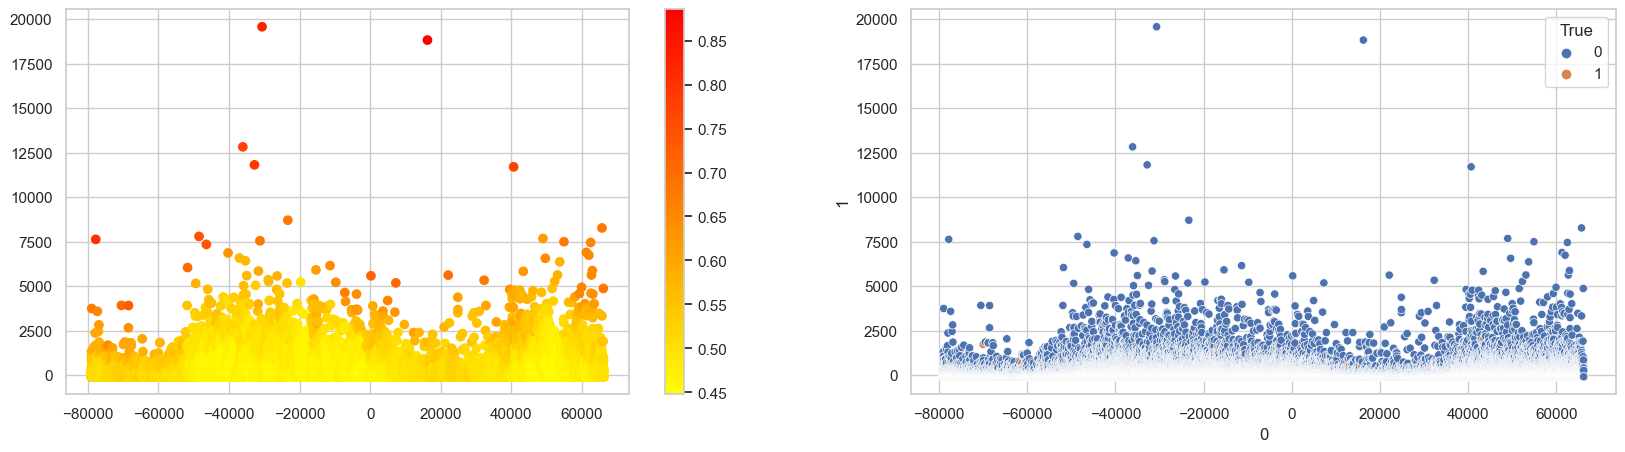

In [94]:
fig, ax = plt.subplots(1, 2, figsize=(20, 5))

ax[0].scatter(df_check[0].values, df_check[1].values, c=df_check['Pred_Prob'].values, cmap='autumn_r')
fig.colorbar(ax[0].collections[0], ax=ax[0])

sns.scatterplot(df_check, x=0, y=1, hue='True', ax=ax[1]);

**Задание 6. (1 балл).** `sklearn` также предлагает нам и другие методы для поиска аномалий. В этом задании мы предлагаем вам сделать следующее:

Для начала попробуйте использовать методы Local Outlier Factor и One-Class SVM. Сравните результаты с IF и EIF.  

In [ ]:
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM

lof = LocalOutlierFactor(novelty=True).fit(train.drop('Class', axis=1), train['Class'])
ocsvm = OneClassSVM().fit(train.drop('Class', axis=1), train['Class'])

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import average_precision_score

pred_lof = lof.predict(df_test.drop("Class", axis=1).values)
pred_svm = ocsvm.predict(df_test.drop("Class", axis=1).values)

print(f'Коэффициент Каппа Коэна на test (LOF): {cohen_kappa_score(test["Class"].values, pred_lof)}')
print(f'MCC на test (LOF): {mcc(test["Class"].values, pred_lof)}')
print(f'PR-AUC на test (LOF): {average_precision_score(test["Class"].values, pred_lof)}', '\n')

print(f'Коэффициент Каппа Коэна на test (OCSVM): {cohen_kappa_score(test["Class"].values, pred_svm)}')
print(f'MCC на test (OCSVM): {mcc(test["Class"].values, pred_svm)}')
print(f'PR-AUC на test (OCSVM): {average_precision_score(test["Class"].values, pred_svm)}', '\n')

У вас началась депрессия из-за плохих метрик? Не беда! Сейчас давайте сделаем так: все методы, опробованные в этой части, попробуем задействовать для создания дополнительных признаков в данных. Проделайте это (не забудьте, что обучаться здесь нужно на трейне). Теперь возьмите лучшую модель из предыдущей части и обучите на новых данных. Смогли ли unsupervised-методы повысить вам качество?

In [ ]:
#your code here

**Бонус. (0.1 балла).**

При сдаче проверяющий запустит следующую клетку один раз. Если она даст положительный результат, вы получите 0.1 бонусных балла. Если она даст отрицательный результат, вы получите -0.1 бонусных балла. 

Если вы хотите отказаться от сдачи данного задания, допишите "хочу" после двоеточия: `your text here`

Ниже вы можете попрактиковаться и оценить ваши силы (изменять код ячейки запрещается!)

In [53]:
import random

rng = random.SystemRandom(0)
rng.uniform(-1.0, 1.0)

0.10909783125513539